<a href="https://colab.research.google.com/github/TuNguyen142/AL-13-2/blob/main/vegetable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
%cd /content/drive/MyDrive/Bài cuối kì Al/vegetables


/content/drive/MyDrive/Bài cuối kì Al/vegetables


In [21]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [22]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/Bài cuối kì Al/vegetables/Train',
                                               target_size=(30,40), batch_size=32, class_mode='categorical')

Found 100 images belonging to 5 classes.


In [23]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Bắp cải': 0,
 'Cà chua': 1,
 'Cà tím': 2,
 'Ớt chuông': 3,
 'Súp lơ xanh': 4}

In [25]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same',input_shape=(30,40,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(64,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(256,activation='linear',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(5,activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
     

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                  

In [26]:
# Thiết lập thông số
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])
# Huấn luyện
# fit the model
# Run the cell. It will take some time to execute
a = model.fit_generator( training_set, epochs=80, steps_per_epoch=len(training_set)
)

<ipython-input-26-f5aecfae2108>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator( training_set, epochs=80, steps_per_epoch=len(training_set)


Epoch 1/80
4/4 [==============================] - 2s 177ms/step - loss: 3.5575 - accuracy: 0.2700
Epoch 2/80
4/4 [==============================] - 1s 188ms/step - loss: 1.9673 - accuracy: 0.3300
Epoch 3/80
4/4 [==============================] - 1s 164ms/step - loss: 1.4460 - accuracy: 0.3400
Epoch 4/80
4/4 [==============================] - 1s 272ms/step - loss: 1.2899 - accuracy: 0.5100
Epoch 5/80
4/4 [==============================] - 1s 314ms/step - loss: 1.1036 - accuracy: 0.5500
Epoch 6/80
4/4 [==============================] - 1s 169ms/step - loss: 0.9317 - accuracy: 0.5900
Epoch 7/80
4/4 [==============================] - 1s 157ms/step - loss: 0.9100 - accuracy: 0.5600
Epoch 8/80
4/4 [==============================] - 1s 166ms/step - loss: 0.7651 - accuracy: 0.6300
Epoch 9/80
4/4 [==============================] - 1s 232ms/step - loss: 0.6612 - accuracy: 0.6900
Epoch 10/80
4/4 [==============================] - 1s 251ms/step - loss: 0.7075 - accuracy: 0.6200
Epoch 11/80
4/4 [==

In [27]:
model.save('/content/drive/MyDrive/Bài cuối kì Al/vegetables/Train.h5')

In [28]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.018918918445706367
Train Accuracy 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

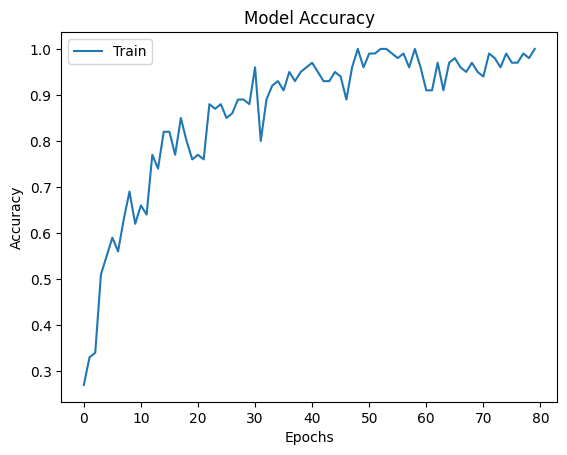

In [29]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(a.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show

In [30]:
model1= load_model('/content/drive/MyDrive/Bài cuối kì Al/vegetables/Train.h5')

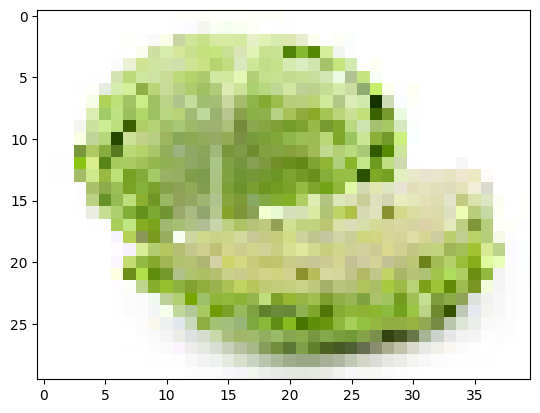

In [31]:
img = load_img('/content/drive/MyDrive/Bài cuối kì Al/vegetables/Test/bc1.jpg', target_size=(30,40))
plt.imshow(img)

In [32]:
class_name=['Bắp cải', 'Cà chua', 'Cà tím', 'Ớt chuông', 'Súp lơ xanh']

In [33]:
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,30,40,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
class_name[y_classes[0]]

1/1 [==============================] - 0s 90ms/step
[[9.9987328e-01 1.4192967e-06 1.1488006e-08 3.2823555e-06 1.2194228e-04]]


'Bắp cải'